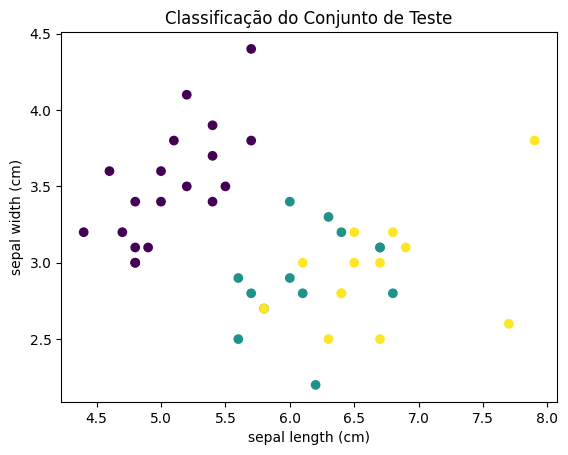

In [9]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


# Visualizar alguns resultados
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Classificação do Conjunto de Teste')
plt.show()
                       



Found 20 images belonging to 3 classes.
Found 3 images belonging to 3 classes.
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3500 - loss: 1.1229 - val_accuracy: 0.3333 - val_loss: 2.2942
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step - accuracy: 0.3500 - loss: 2.6443 - val_accuracy: 0.3333 - val_loss: 2.2339
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - accuracy: 0.5000 - loss: 2.1947 - val_accuracy: 0.3333 - val_loss: 1.3897
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step - accuracy: 0.3000 - loss: 1.4290 - val_accuracy: 0.3333 - val_loss: 1.1328
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - accuracy: 0.5500 - loss: 1.0356 - val_accuracy: 0.3333 - val_loss: 1.0932
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 0.4000 - loss: 1.0940 - val_accuracy: 0.3333 - val_loss: 1.0320
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - accuracy: 0.5500 - loss: 0.9967 - val_accuracy: 0.6667 - val_loss: 0.9977
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━

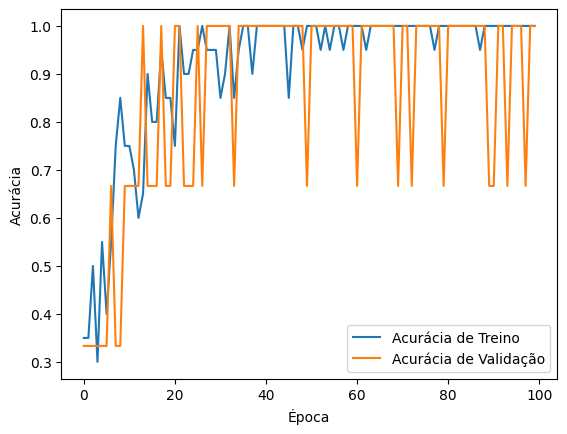

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir o caminho das diretórias
base_dir = 'dataset'
train_dir = os.path.join(base_dir)

# Parâmetros
img_width, img_height = 150, 150
batch_size = 32
epochs = 100

# Data augmentation e normalização
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Geradores de dados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Construir o modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: apples, lemons, onions
])

# Compilar o modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

# Avaliar o modelo
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
